In [74]:
import pandas as pd
import seaborn as sns
#import numpy as np
import matplotlib.pyplot as plt
import glob
from prophet import Prophet

In [75]:
files=glob.glob('*.{}'.format('csv'))

dataset=pd.DataFrame()
for file in files:
    df=pd.read_csv(file)
    dataset=dataset._append(df)
dataset.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [76]:
dataset['date']=pd.to_datetime(dataset['Date'])
dataset=dataset.drop(columns=['Date','store','product'],axis=1)
dataset=dataset.set_index('date')

In [77]:
dataset['2010-01-01':'2010-01-03'].number_sold.mean()

784.2523809523809

<Axes: xlabel='date'>

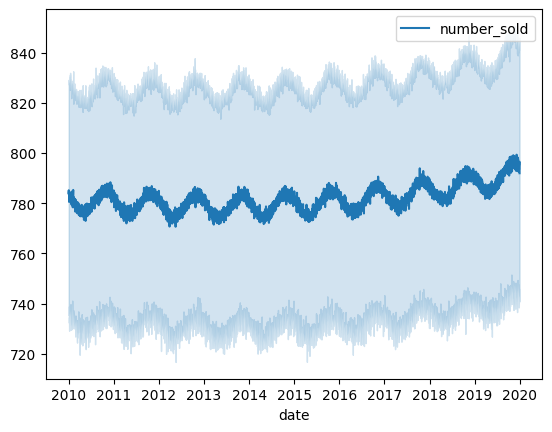

In [78]:
sns.lineplot(dataset)

# Stationarity 

In [79]:
rolling_mean=dataset.rolling(7).mean
rolling_std=dataset.rolling(7).std

In [87]:
autocorrelation_lag1=dataset['number_sold'].autocorr(lag=9)
print(autocorrelation_lag1)

0.9942248360529734
